Load in the data, convert to minutes and give better column names.

In [1]:
%matplotlib inline

import pandas as pd
import datetime
import matplotlib.pyplot as plt
plt.style.use('ggplot')

going_df = pd.read_pickle('./data/going_df.p')

returning_df = pd.read_pickle('./data/returning_df.p')

# transform seconds to minutes
going_df = going_df / 60
returning_df = returning_df / 60
# change column names for clarity
col_names = {'optimistic':'best_case', 'best_guess':'average', 'pessimistic':'worst_case'}
going_df = going_df.rename(columns=col_names)
returning_df = returning_df.rename(columns=col_names)

returning_df.head()

/Users/cselig/.pyenv/versions/3.6.0/envs/commute_time/lib/python3.6/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


,best_case,average,worst_case
2019-10-10 14:00:00,18.250000,21.483333,25.766667
2019-10-10 15:00:00,25.216667,32.616667,45.016667
2019-10-10 16:00:00,30.550000,39.300000,59.333333
2019-10-10 17:00:00,39.316667,47.733333,72.516667
2019-10-10 18:00:00,31.600000,36.566667,53.283333


# Morning Commute

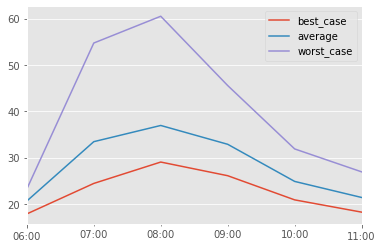

In [2]:
# TODO redo this date logic
monday_going_df = going_df['2019-10-10']
monday_going_df.plot(kind='line');

Let's see how another day of the week looks.

In [ ]:
tuesday_going_df = going_df.loc['2019-10-10']
tuesday_going_df.plot(kind='line');

Tuesday is a lot worse. Let's plot variations over the whole work week using the "average" time.

In [ ]:
# create list of dataframes for each day of week
going_df_by_day = [going_df.loc['2017-10-' + str(x)]['average'] for x in range(2, 7)]
common_axis_morning = [datetime.time(6 + hour, 0 + minute) 
                       for hour in range(0, 6) for minute in range(0, 60, 10)]

for day in going_df_by_day:
    plt.plot(common_axis_morning, day)

plt.xticks([str(hour) + ':00' for hour in range(6, 12)])
plt.legend(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']);

The middle of the week is pretty bad, while Monday and Friday have far lower average commute times. Friday is the only day that doesn't exhibit a drop-off after 9am, but instead rises. Don't know what that's about. 

# Returning

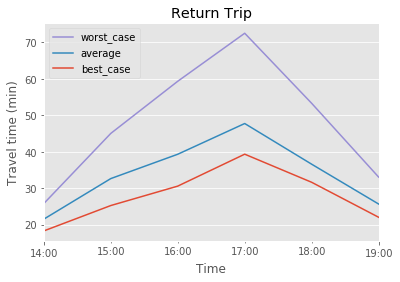

In [3]:
monday_returning_df = returning_df.loc['2019-10-10']
ax = monday_returning_df.plot(kind='line', title='Return Trip', legend='reverse')
ax.set_xlabel('Time')
ax.set_ylabel('Travel time (min)');

Travel times are worse in the afternoon, above an average of 40min from 3pm. Times start to become managable (30min) again after around 6pm.

In [ ]:
returning_df_by_day = [returning_df.loc['2017-10-' + str(x)]['average'] for x in range(2, 7)]
common_axis_afternoon = [datetime.time(14 + hour, 0 + minute) 
                         for hour in range(0, 6) for minute in range(0, 60, 10)]

for day in returning_df_by_day:
    plt.plot(common_axis_afternoon, day)

plt.xticks([str(hour) + ':00' for hour in range(14, 20)])
plt.legend(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']);

For whatever reason, the afternoon commute is much more consistent across days of the week. It also looks like people tend to leave work earlier on Fridays. 